In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from config import Archive_Path
from os.path import join
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from datetime import datetime

In [2]:
# Check if GPU is working
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Machine Learning Model

### Importing the Data

In [3]:
BKG_DATA = pd.read_hdf(join(Archive_Path,"Data.h5"), key="BKG").drop(columns=['Name'])
SIGNAL_DATA = pd.read_hdf(join(Archive_Path,"Data.h5"), key="SIGNAL").drop(columns=['Name'])
DATA = pd.concat([BKG_DATA, SIGNAL_DATA])

In [4]:
DATA.describe()

,CaloJet08_Multi,CaloJet081_PT,CaloJet082_PT,CaloJet083_PT,CaloJet084_PT,CaloJet085_PT,CaloJet081_Mass,CaloJet082_Mass,CaloJet083_Mass,CaloJet084_Mass,...,Electron2_PT,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,Weights,Label
count,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,...,1772235.0,1772235.0,1772235.0,1772235.0,1772235.0,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06,1.772235e+06
mean,3.685888e+00,1.924753e+02,7.989907e+01,4.203439e+01,2.351185e+01,1.184000e+01,5.162890e+01,1.708310e+01,8.818363e+00,5.035360e+00,...,0.0,0.0,0.0,0.0,0.0,1.465916e+02,-6.436436e-04,5.241840e+02,9.157562e-04,3.699233e-01
std,1.641729e+00,1.366093e+02,6.436673e+01,3.561796e+01,2.605611e+01,1.898772e+01,4.757459e+01,1.818846e+01,9.129737e+00,6.438302e+00,...,0.0,0.0,0.0,0.0,0.0,1.715873e+02,1.813562e+00,1.985588e+02,4.002377e-03,4.827838e-01
min,1.000000e+00,2.501421e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.103516e-05,-4.315837e-05,-2.642900e-05,-3.051758e-05,...,0.0,0.0,0.0,0.0,0.0,3.349080e-02,-3.141589e+00,4.780229e+01,2.064089e-08,0.000000e+00
25%,2.000000e+00,8.491979e+01,4.466983e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.509789e+01,7.041093e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.783631e+01,-1.570792e+00,3.963231e+02,2.064089e-08,0.000000e+00
50%,4.000000e+00,1.356442e+02,6.704461e+01,4.143578e+01,2.613684e+01,0.000000e+00,3.105266e+01,1.243063e+01,7.545066e+00,2.162168e+00,...,0.0,0.0,0.0,0.0,0.0,3.746904e+01,-3.075163e-03,5.058563e+02,2.242673e-04,0.000000e+00
75%,5.000000e+00,2.936485e+02,9.751515e+01,6.068507e+01,4.166824e+01,2.834414e+01,7.773482e+01,2.096646e+01,1.290246e+01,8.899518e+00,...,0.0,0.0,0.0,0.0,0.0,3.139219e+02,1.570583e+00,6.210413e+02,2.242673e-04,1.000000e+00
max,1.300000e+01,2.371039e+03,2.324182e+03,8.493058e+02,4.599241e+02,2.559038e+02,7.576913e+02,5.322263e+02,2.131065e+02,1.560580e+02,...,0.0,0.0,0.0,0.0,0.0,1.887764e+03,3.141587e+00,4.956182e+03,2.453500e-02,1.000000e+00


In [5]:
DATA.head()

,CaloJet08_Multi,CaloJet081_PT,CaloJet082_PT,CaloJet083_PT,CaloJet084_PT,CaloJet085_PT,CaloJet081_Mass,CaloJet082_Mass,CaloJet083_Mass,CaloJet084_Mass,...,Electron2_PT,Electron1_Eta,Electron2_Eta,Electron1_Phi,Electron2_Phi,MissingET_MET,MissingET_Phi,ScalarHT_HT,Weights,Label
1,5,78.134315,60.740273,55.594318,44.602814,39.342297,19.603081,18.443394,17.563574,8.237407,...,0.0,0.0,0.0,0.0,0.0,21.268677,-1.515701,475.996521,0.000224,0
2,5,129.468018,71.359200,65.418617,46.171494,41.627316,59.793392,7.372412,8.538475,18.765919,...,0.0,0.0,0.0,0.0,0.0,6.481680,2.171233,468.308167,0.000224,0
3,7,164.014664,152.203461,82.661522,73.987976,71.653145,76.315224,62.576714,23.927755,7.749176,...,0.0,0.0,0.0,0.0,0.0,4.985295,-1.499350,851.039490,0.000224,0
4,5,53.296463,49.864231,48.902733,31.403723,26.936249,13.913019,13.436581,9.532109,7.225173,...,0.0,0.0,0.0,0.0,0.0,12.073826,0.026459,271.788544,0.000224,0
5,7,118.069626,86.860306,70.204033,45.998665,35.320221,31.692238,33.111141,14.984803,8.827754,...,0.0,0.0,0.0,0.0,0.0,26.777517,-0.862058,528.228027,0.000224,0


In [6]:
# Delete variables to save up RAM
del BKG_DATA
del SIGNAL_DATA

### Splitting the data

In [7]:
# Test, Val, Train  -> 1/3 of the data
X_train, X_test, y_train, y_test = train_test_split(DATA.drop(columns=['Label']), DATA['Label'], test_size=1/3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42) 

# Release RAM
del DATA

### Standardization of the data

In [8]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())
        
std_layer = Standardization()
std_layer.adapt(X_train.drop(columns=['Weights']).to_numpy())

Definir as class_weights para os dados de treino

In [9]:
class_weights = {
    0: 1,
    1: len([x for x in y_train if x == 0]) / len([x for x in y_train if x == 1]) 
    # Nº de elementos da classe de referencia a dividir pelo nº de elementos da classe atual
    # Ref = sinal
}

## Built the model

In [10]:
inputs = keras.layers.Input(shape=(X_train.shape[1]-1,))
std = std_layer

l1 = keras.layers.Dense(100, activation='relu')(inputs)
d1 = keras.layers.Dropout(0.1)(l1, training=True)

l2 = keras.layers.Dense(100, activation='relu')(d1)
d2 = keras.layers.Dropout(0.1)(l2, training=True)

l3 = keras.layers.Dense(100, activation='relu')(d2)
d3 = keras.layers.Dropout(0.1)(l3, training=True)

l3 = keras.layers.Dense(30, activation='relu')(d2)
d3 = keras.layers.Dropout(0.1)(l3, training=True)

outputs = keras.layers.Dense(1, activation='sigmoid')(d3)


model = keras.Model(inputs, outputs)

model.compile(
              optimizer='adam', 
              loss="binary_crossentropy", 
              metrics=["accuracy", keras.metrics.AUC()]
              )

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 69)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               7000      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)               

In [12]:
# Model name
name = str(datetime.now().strftime("%d/%m/%Y-%H:%M:%S"))

# Tensorboard
TB = keras.callbacks.TensorBoard(log_dir="logs/" + name, write_images=True)

# Early Stopping
ES = keras.callbacks.EarlyStopping(monitor="loss", patience=30, verbose=2, mode="min")

# Model Checkpoint
MC = keras.callbacks.ModelCheckpoint(filepath="models/" + name + "/", save_best_only=True, monitor="val_loss", mode="min")

### Starting Training!

In [13]:

history = model.fit(
    x=X_train.drop(columns=['Weights']).to_numpy(),
    y=y_train.to_numpy(),
    epochs=500,
    batch_size=512,
    shuffle=True,
    class_weight=class_weights,
    callbacks=[TB, ES, MC],
    sample_weight=X_train['Weights'].to_numpy(),
    validation_data=(X_val.drop(columns=['Weights']).to_numpy(), y_val.to_numpy()),
    
    )
        

 - auc: 0.9346 - val_loss: 0.5607 - val_accuracy: 0.9409 - val_auc: 0.9517
Epoch 126/500
1154/1154 [==============================] - 5s 4ms/step - loss: 3.8448e-08 - accuracy: 0.9369 - auc: 0.9497 - val_loss: 0.6270 - val_accuracy: 0.9071 - val_auc: 0.9454
Epoch 127/500
1154/1154 [==============================] - 6s 5ms/step - loss: 3.5776e-08 - accuracy: 0.9232 - auc: 0.9526 - val_loss: 0.4811 - val_accuracy: 0.9386 - val_auc: 0.9592
Epoch 128/500
1154/1154 [==============================] - 5s 4ms/step - loss: 4.2722e-08 - accuracy: 0.9266 - auc: 0.9457 - val_loss: 0.9443 - val_accuracy: 0.8775 - val_auc: 0.9188
Epoch 129/500
1154/1154 [==============================] - 5s 4ms/step - loss: 4.0010e-08 - accuracy: 0.9241 - auc: 0.9421 - val_loss: 0.5108 - val_accuracy: 0.9404 - val_auc: 0.9533
Epoch 130/500
1154/1154 [==============================] - 5s 4ms/step - loss: 3.9603e-08 - accuracy: 0.9277 - auc: 0.9432 - val_loss: 0.5026 - val_accuracy: 0.9346 - val_auc: 0.9541
Epoch 131/

## Metrics 

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve

In [15]:
y_preds = model.predict(X_test.drop(columns=['Weights']).values, batch_size=512).reshape(-1)

In [16]:
accuracy_score(y_test.values, y_preds.round())

0.942264428814463

### Confusion matrix
-> Background is the positive class

-> Signal is the negative class

<img src=https://cdn.discordapp.com/attachments/710910920460599327/734843424666288228/confusionMatrxiUpdated.png width="600">

In [17]:
confusion_matrix(y_test.values, y_preds.round())

array([[371941,     15],
       [ 34092, 184697]])

In [18]:
confusion_matrix(y_test.values, y_preds.round(), normalize="all")

array([[6.29613454e-01, 2.53916665e-05],
       [5.77101795e-02, 3.12650975e-01]])

In [19]:
precision_score(y_test.values, y_preds.round())

0.9999187924985924

In [20]:
recall_score(y_test.values, y_preds.round())

0.8441786378657062

### Plotting Roc Curve
#### Link for more information - https://www.youtube.com/watch?v=4jRBRDbJemM
#### An Example:

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png width="400">

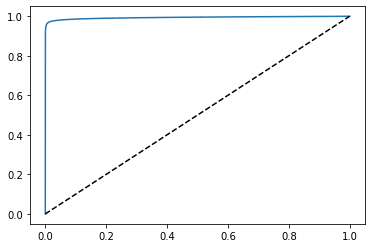


ROC Score: 0.9934078794963115


In [21]:
# fpr = False positive rate
# tpr = True positive rate
fpr, tpr, thr = roc_curve(y_test, y_preds)
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.show()
print("\nROC Score:", bMC := roc_auc_score(y_test, y_preds))

## Monte Carlo Dropout Implementation

In [22]:
X_test_numpy = X_test.drop(columns=['Weights']).to_numpy()

In [23]:
MC_y_preds = np.stack([model.predict(X_test_numpy, batch_size=1024) for samples in range(100)])

In [24]:
MC_y_preds = MC_y_preds.mean(axis=0)

## Metrics

In [25]:
confusion_matrix(y_test.values, MC_y_preds.round())

array([[371943,     13],
       [ 32458, 186331]])

In [26]:
accuracy_score(y_test.values, MC_y_preds.round())

0.9450338132358294

### Plotting Roc Curve

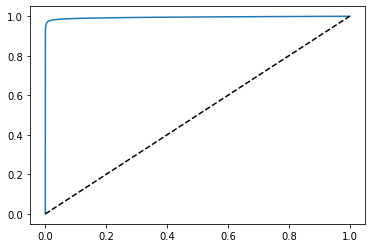


ROC Score: 0.9947038946272739


In [27]:
fpr, tpr, thr = roc_curve(y_test, MC_y_preds)

plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.show()
print("\nROC Score:",aMC := roc_auc_score(y_test, MC_y_preds))

In [28]:
print("Improvement w/MC Dropout - Dropout): ", aMC - bMC)

Improvement w/MC Dropout - Dropout):  0.0012960151309624468
